<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/Module_3_Part_II_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study: Discussing multivariate analysis using the
Titanic dataset**



### Multivariate Analysis of Titanic Dataset

Multivariate analysis involves examining relationships among multiple variables simultaneously. In the context of the Titanic dataset, we aim to understand how several passenger attributes interact and influence the likelihood of survival.

**1. Loading the Dataset and Libraries**

**Explanation:** This initial step is crucial to bring the dataset into our Python environment and import the necessary libraries for data manipulation and visualization. `pandas` is used for creating and managing DataFrames, `numpy` for numerical operations, `seaborn` and `matplotlib.pyplot` for creating informative statistical graphics.

In [45]:
# load python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset
titanic=pd.read_csv("Titanic-Dataset.csv")
print(titanic.info())
titanic.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Examining the DataFrame Shape**

**Explanation:** Understanding the dimensions of the dataset (number of rows and columns) gives us a basic idea of the data we are working with. Each row represents a passenger, and each column represents a specific attribute.

In [46]:
titanic.shape

(891, 12)

**3. Identifying Missing Values**

**Explanation:** Missing data can significantly impact our analysis. Identifying the columns with missing values and the extent of missingness helps us decide on appropriate data cleaning or imputation strategies. The output clearly shows that 'Cabin' has a large number of missing values, followed by 'Age' and 'Embarked'.

In [47]:
total = titanic.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Gender,0
Parch,0
SibSp,0


**4. Analyzing Survival Rate by Gender (Bivariate Analysis)**

**Explanation:** This step performs a bivariate analysis, looking at the relationship between two variables: 'Gender' and 'Survived'. Calculating the survival rates for men and women provides an initial insight into how gender might be related to survival. The results strongly suggest that women had a significantly higher survival rate than men.

In [48]:
#percentage of women survived
women = titanic.loc[titanic.Gender == 'female']["Survived"]
rate_women = sum(women)/len(women)
#percentage of men survived
men = titanic.loc[titanic.Gender == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(str(rate_women) +" % of women who survived." )
print(str(rate_men) + " % of men who survived." )

0.7420382165605095 % of women who survived.
0.18890814558058924 % of men who survived.


**5. Visualizing Survival by Gender (Bivariate Visualization)**

**Explanation:** Visualizing the counts of survivors and non-survivors for each gender provides a clearer picture of the distribution. The bar plots reinforce the finding from the previous step, showing a higher number of female survivors and a higher number of male deaths.

Data type of Survived column BEFORE mapping: int64
Value counts of Survived BEFORE mapping (with dtype):
Survived
0    549
1    342
Name: count, dtype: int64

Data type of Survived column AFTER mapping: object
Value counts of Survived AFTER mapping (with dtype):
Survived
not_survived    549
survived        342
Name: count, dtype: int64

Value counts of Gender:
Gender
male      577
female    314
Name: count, dtype: int64


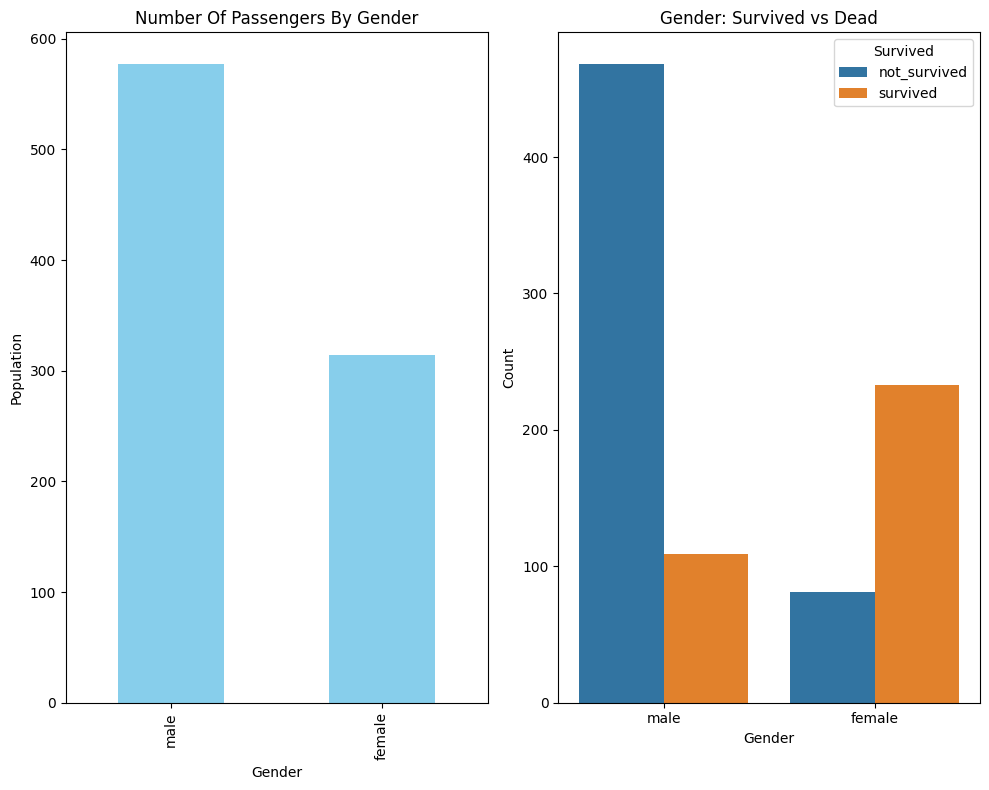

In [49]:


# Inspect the 'Survived' column BEFORE mapping
print("Data type of Survived column BEFORE mapping:", titanic['Survived'].dtype)
print("Value counts of Survived BEFORE mapping (with dtype):")
print(titanic['Survived'].value_counts(dropna=False))

# Apply the mapping with INTEGER keys
mapping = {0: "not_survived", 1: "survived"}
titanic['Survived'] = titanic['Survived'].map(mapping)

# Inspect the 'Survived' column AFTER mapping
print("\nData type of Survived column AFTER mapping:", titanic['Survived'].dtype)
print("Value counts of Survived AFTER mapping (with dtype):")
print(titanic['Survived'].value_counts(dropna=False))

# Inspect the 'Gender' column
print("\nValue counts of Gender:")
print(titanic['Gender'].value_counts())

# Visualize the survival by gender
fig, ax = plt.subplots(1, 2, figsize = (10, 8))

# First plot (Number of Passengers By Gender)
titanic["Gender"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number Of Passengers By Gender")
ax[0].set_ylabel("Population")

# Second plot (Survived vs Dead by Gender) - Explicit x and hue
sns.countplot(x='Gender', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title("Gender: Survived vs Dead")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**6. Visualizing Survival by Passenger Class (Bivariate Visualization)**

**Explanation:** This step examines the relationship between 'Pclass' (passenger class) and 'Survived'. The count plots show the distribution of passengers across the three classes and how survival varied within each class. This visualization suggests that passengers in higher classes (Pclass 1) had a better chance of survival.

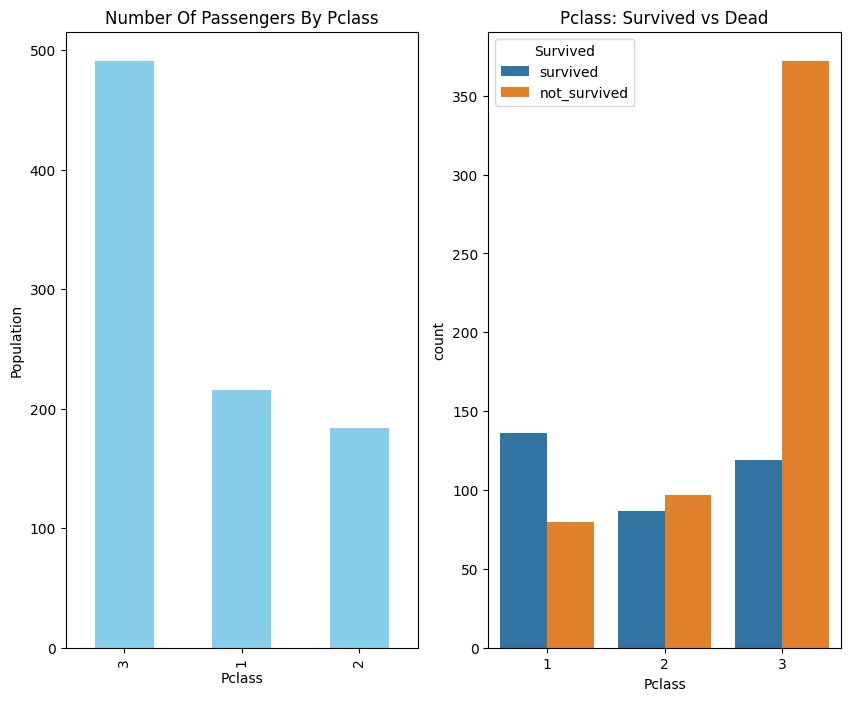

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
titanic["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x="Pclass", hue="Survived", data=titanic, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

**7. Visualizing Survival by Embarkation Port (Bivariate Visualization)**

**Explanation:** This step explores the relationship between the port of embarkation ('Embarked') and survival. The plots show the number of passengers who embarked from each port and the survival rates associated with each port. This might indicate geographical or socioeconomic factors influencing survival.

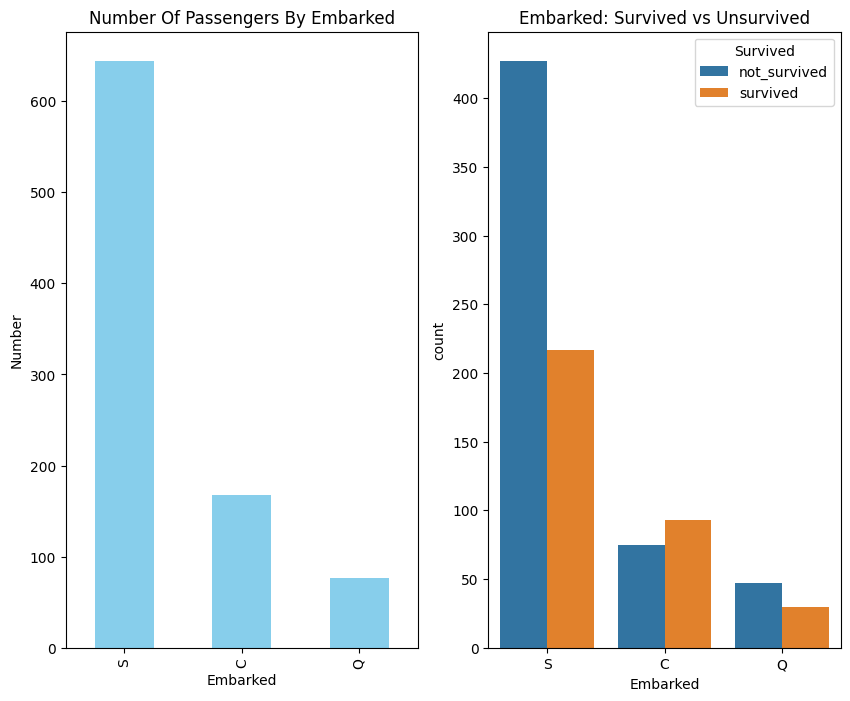

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
titanic["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot(x="Embarked", hue="Survived", data=titanic, ax=ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

**8. Visualizing Age Distribution (Univariate Visualization)**

**Explanation:** While not directly linked to survival in this step, understanding the distribution of the 'Age' variable is important for potential inclusion in multivariate analysis later. The `distplot` shows the frequency of different age groups among the passengers. The `dropna()` method is used to handle the missing age values for this visualization.

<ipython-input-55-9902d9beae5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

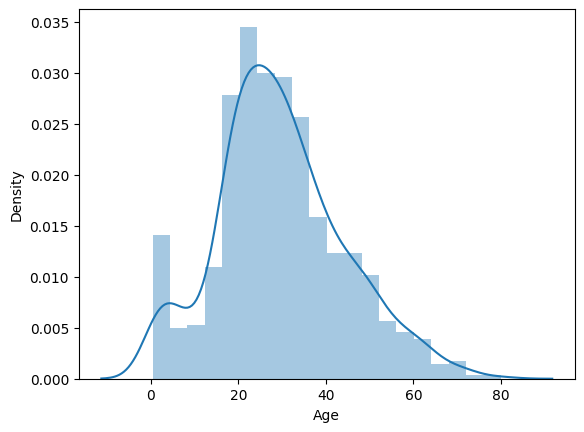

In [55]:
sns.distplot(titanic['Age'].dropna())

**9. Multivariate Analysis using Pair Plots**

**Explanation:** This is a key step in multivariate analysis. The `pairplot` creates a matrix of scatter plots for the selected numerical variables ('Fare', 'Age', 'Pclass'), with the points colored based on the 'Survived' status. This allows us to visually inspect potential relationships and dependencies between these variables and how they jointly relate to survival. For instance, we might look for patterns where certain combinations of fare, age, and passenger class are more likely to result in survival.

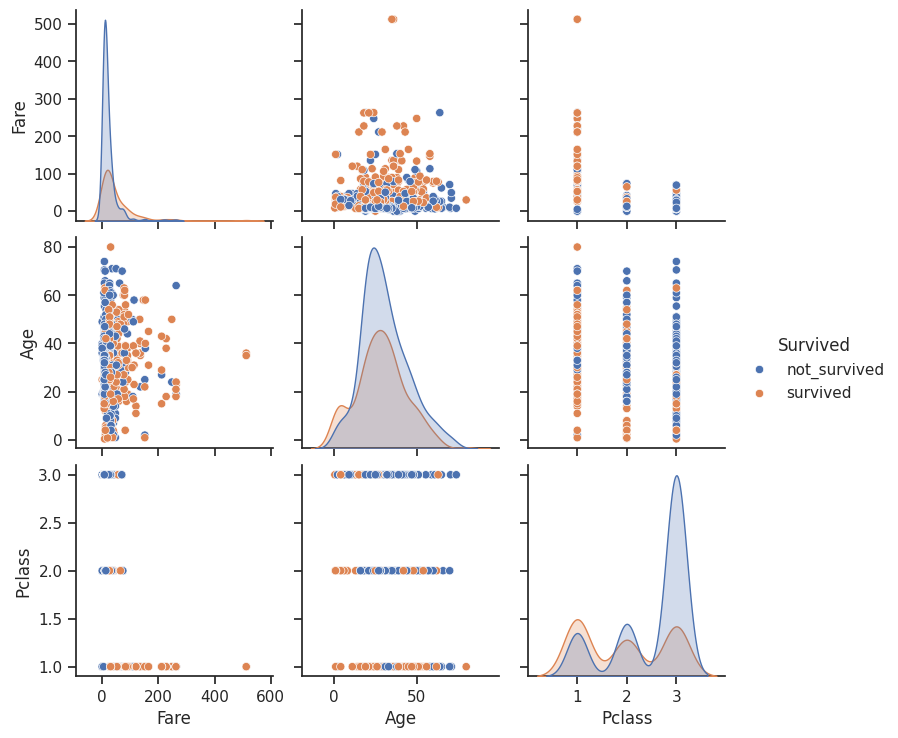

In [56]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,vars = [ 'Fare','Age','Pclass'],
hue="Survived")
plt.show()

**10. Preparing 'Embarked' for Correlation Analysis and Calculating Correlation Matrix**

**Explanation:** To include the categorical 'Embarked' variable in a correlation analysis (which typically works with numerical data), it is first converted into numerical representations using a mapping. Then, the `corr()` method calculates the Pearson correlation coefficient between all pairs of numerical columns in the DataFrame. The resulting correlation matrix shows the linear relationships between these variables.

In [58]:
titanic['Embarked'] = titanic['Embarked'].map({"S":1,"C":2,"Q":2,float('nan'):0}) # Corrected NaN handling
Tcorrelation = titanic.select_dtypes(include=['number']).corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**11. Visualizing the Correlation Matrix with a Heatmap**

**Explanation:** A heatmap provides a visual representation of the correlation matrix. The color intensity and direction indicate the strength and type (positive or negative) of the linear relationship between the variables. This allows for a quick identification of which variables are most strongly correlated with each other and, importantly, with the 'Survived' variable. For example, a positive correlation between 'Fare' and 'Survived' would suggest that passengers who paid higher fares were more likely to survive.

<Axes: >

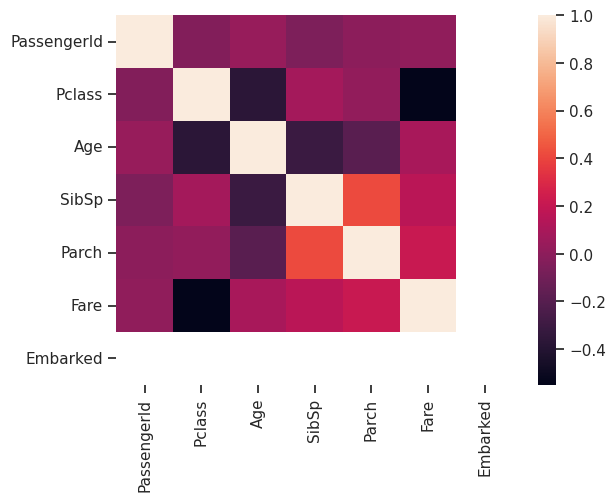

In [59]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
 yticklabels=Tcorrelation.columns)

By examining the correlation heatmap and the pair plots, we can start to identify potential multivariate relationships influencing survival. For instance, we might observe that higher fares are associated with first-class passengers, who also had a higher survival rate. This suggests a potential interplay between these factors. Further analysis, such as more sophisticated statistical models, would be needed to quantify these relationships and understand the independent and combined effects of these variables on survival.